# Lorenz 96 Tangent Integrator Test

In this notebook we test the L96 tangent integrator.

In [13]:
# -----------------------------------------
# Imports
# -----------------------------------------

# Standard Modules
import numpy as np
import pickle
import time as tm
import xarray as xr
import os
import matplotlib.pyplot as plt
import random

# Lorenz 96 integrator
import l96tangent as l96t
from l96tangent import make_observations

# Ginelli Imports
import ginelli_utilities as utilities
from ginelli_observers import *
from ginelli_plot import *

In [2]:
# Definining Integrator and Observables

runner = l96t.Integrator(K=36, J=10)
trajectory_looker = l96t.TrajectoryObserver(runner)

In [3]:
#runner.integrate(3)

In [4]:
# Observing an integration
num_obs = 1000
obs_freq = 1.e-3


make_observations(runner, trajectory_looker, num_obs, obs_freq)

In [5]:
data = trajectory_looker.observations

In [8]:
# L96 Visualisation

def add_point(X): 
    return np.append(X, X[0])


def state_plot(data, time):

    K = len(data.X.K)
    J = len(data.Y.KJ)

    X = add_point(data.X[time])
    Y = add_point(data.Y[time])

    X_theta = [(2 * np.pi)/K * i for i in range(K + 1)]
    Y_theta = [2 * np.pi/(J) * i for i in range(J + 1)]
    fig = plt.figure(figsize=(5, 5))
    ax1 = fig.add_subplot(111, projection='polar')
    ax1.plot(X_theta, X, '*--', lw=3, zorder=10, alpha=0.5, label='X')
    ax1.plot(Y_theta, Y, '.-', alpha = 0.5, lw=3, zorder=10, label='Y')
    ax1.set_rmin(-14); ax1.set_rmax(14)
    ax1.set_thetagrids([])
    ax1.set_rorigin(-22)
    ax1.legend(frameon=False, loc=1);
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

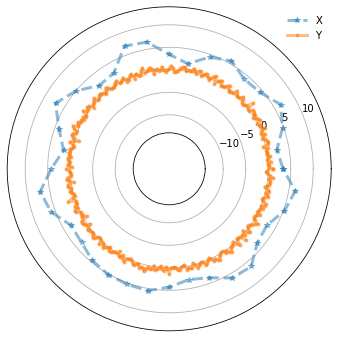

In [9]:
state_plot(data, -1)

In [10]:
data.dy

<xarray.DataArray 'dy' (time: 1000, KJ: 360)>
array([[ 0.00667829,  0.00667837,  0.00667837, ...,  0.00635089,
         0.00635082,  0.00635082],
       [ 0.01329913,  0.01329971,  0.01329971, ...,  0.0126481 ,
         0.01264755,  0.01264753],
       [ 0.01986259,  0.01986452,  0.01986453, ...,  0.0188921 ,
         0.01889027,  0.01889017],
       ...,
       [ 1.00916593,  0.06100219,  0.0935887 , ...,  0.00566495,
        -0.50898477, -0.09078141],
       [ 1.00689969,  0.08094032,  0.10801011, ..., -0.01029552,
        -0.48021012, -0.13425715],
       [ 1.0036953 ,  0.10185921,  0.12078126, ..., -0.02658   ,
        -0.44722036, -0.17610085]])
Coordinates:
  * time     (time) float64 0.001 0.002 0.003 0.004 ... 0.997 0.998 0.999 1.0
  * KJ       (KJ) int64 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360

In [ ]:
np.array([1, 1])/2

In [ ]:
plt.plot(data.dx.sel(x=1))

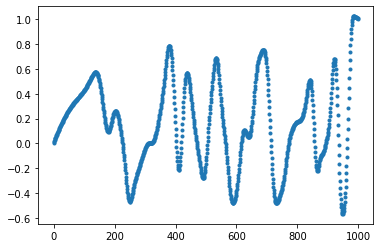

In [12]:
plt.plot(data.dy.sel(KJ=1), '.')

In [ ]:
data.dy.sel(y=1)[0]